In [1]:
from chatlab import Chat, system
from chatlab.builtins import run_cell
from chatlab.models import GPT_4_0613, GPT_3_5_TURBO_0613, GPT_3_5_TURBO_16K_0613

NOTEBOOK_ASSISTANCE_PROMPT = """
As a coding assistant, your task is to help users write code in Python within Jupyter Notebooks. The environment you are running in has the full PyData/NumFOCUS suite.

The user is able to interact with the same variables as you. It's ok to use `display` on objects like `DataFrame`s.

Do not "type out" tables or column information directly back to the user. They can `display` it themselves.
""".strip()

chat = Chat(
    system(NOTEBOOK_ASSISTANCE_PROMPT),
    allow_hallucinated_python=True,
    model=GPT_3_5_TURBO_16K_0613
)
chat.register(run_cell)

await chat(f"""
Load this data:

https://data.cityofberkeley.info/resource/bscu-qpbu.json

After you familiarize yourself with it, I want to answer the following questions:

* How many tickets are still open per category and subcategory?
* Which tickets have been open the longest?
""")

It seems that there are no tickets that are still open, as the open duration for each of the open tickets is not available. Therefore, I cannot provide information on the tickets that have been open the longest.

Please let me know if there is anything else I can help you with.

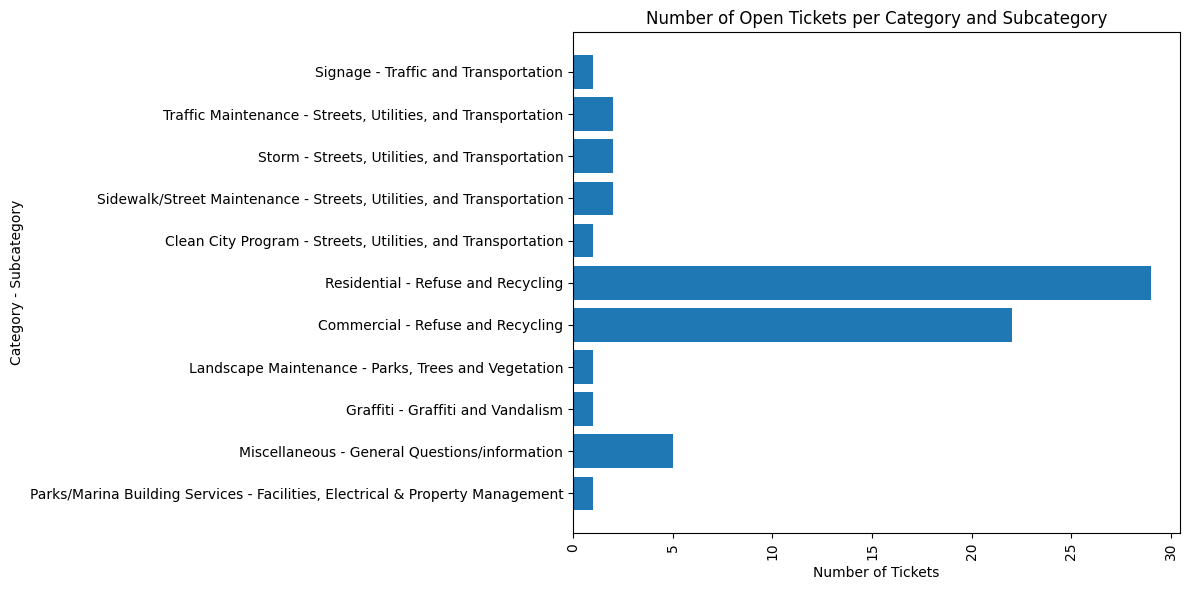

Here is a plot of the number of open tickets per category and subcategory.

Note that some subcategories may have the same name across different categories, so the labels on the y-axis show both the subcategory and its corresponding category.

Let me know if there is anything else I can assist you with.

In [3]:
await chat.submit("Can you plot the number of open tickets per category and subcategory?")